<a href="https://colab.research.google.com/github/prathikshaharish/TRIAL/blob/main/FINAL_PROJ_EXOOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Metric      Value
0         Accuracy   0.944444
1        Precision   1.000000
2           Recall   0.857143
3         F1 Score   0.923077
4   True Negatives  11.000000
5  False Positives   0.000000
6  False Negatives   1.000000
7   True Positives   6.000000


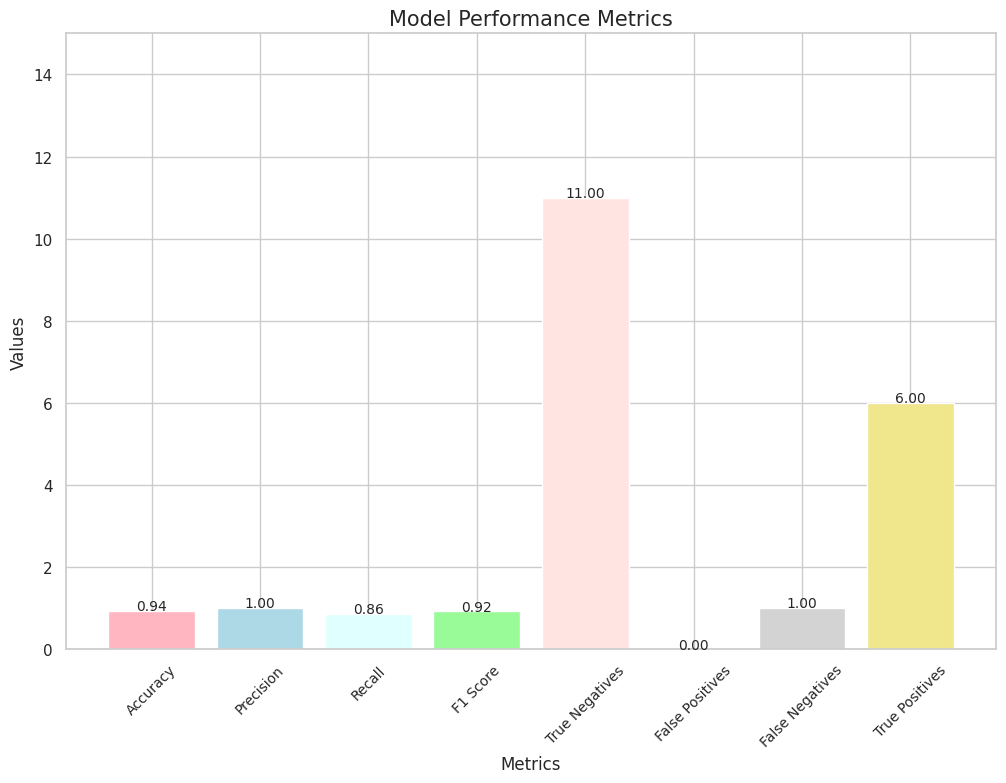

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
final_data_path = '/content/mostly-final-corrected.csv'
final_data = pd.read_csv(final_data_path)

# Prepare the features and target variable
X = final_data[['EMG Rest (µV)', 'EMG Flexion (µV)', 'EMG Extension (µV)', 'EEG Rest (µV)', 'EEG Flexion (µV)', 'EEG Extension (µV)']]
y = final_data['Category'].apply(lambda x: 1 if x == 'Pain' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Prepare the metrics DataFrame
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'True Negatives', 'False Positives', 'False Negatives', 'True Positives'],
    'Value': [accuracy, precision, recall, f1, tn, fp, fn, tp]
}

metrics_df = pd.DataFrame(metrics)
# Displaying the metrics directly
print(metrics_df)

import matplotlib.pyplot as plt

# Displaying the metrics dataframe
metrics_df

# Plotting the metrics with adjusted font size and rotated labels, ensuring value labels are correctly positioned
plt.figure(figsize=(12, 8))

# Defining colors
colors = ['#FFB6C1', '#ADD8E6', '#E0FFFF', '#98FB98', '#FFE4E1', '#AFEEEE', '#D3D3D3', '#F0E68C']

# Bar plot for metrics
plt.bar(metrics_df['Metric'], metrics_df['Value'], color=colors)

# Adding titles and labels
plt.title('Model Performance Metrics', fontsize=15)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 15)

# Rotating x-axis labels and reducing font size
plt.xticks(rotation=45, fontsize=10)

# Adding value labels on top of bars with adjusted positioning
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.show()


**Confusion Matrix**

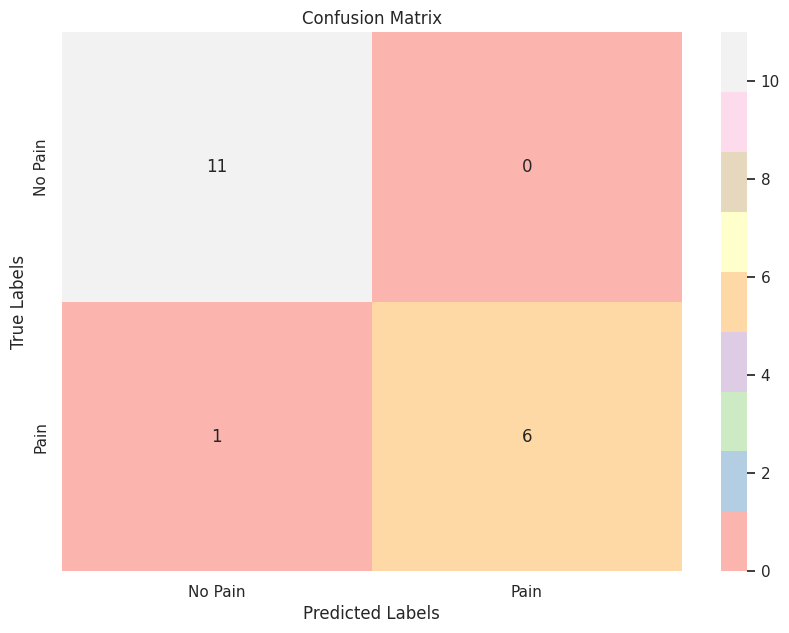

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['No Pain', 'Pain'], yticklabels=['No Pain', 'Pain'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Feature Importance**

<ipython-input-38-c79e81568fce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Pastel1')


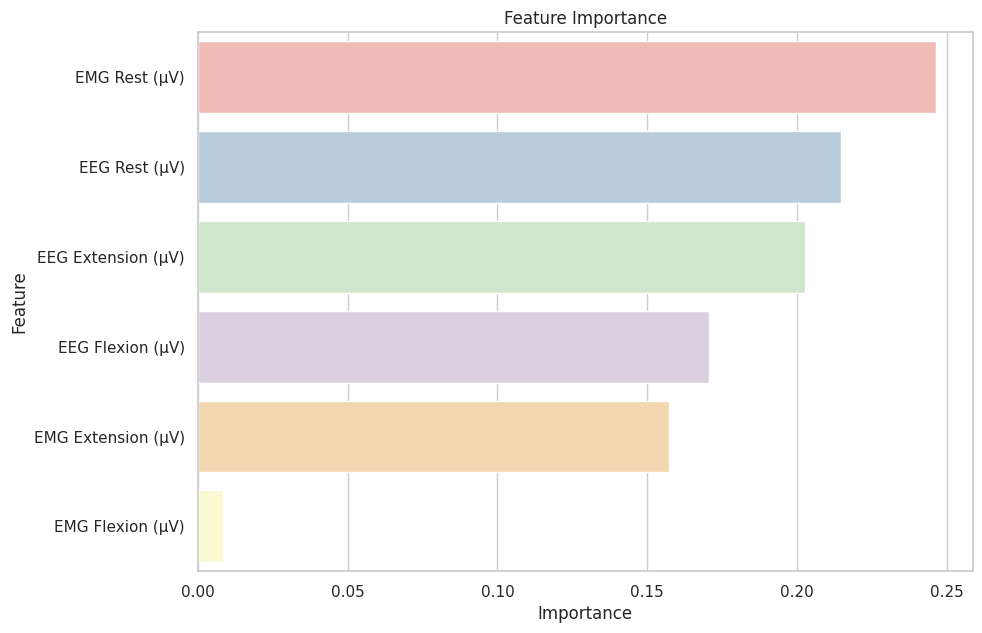

In [38]:
# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Pastel1')
plt.title('Feature Importance')
plt.show()


**ROC Curve**

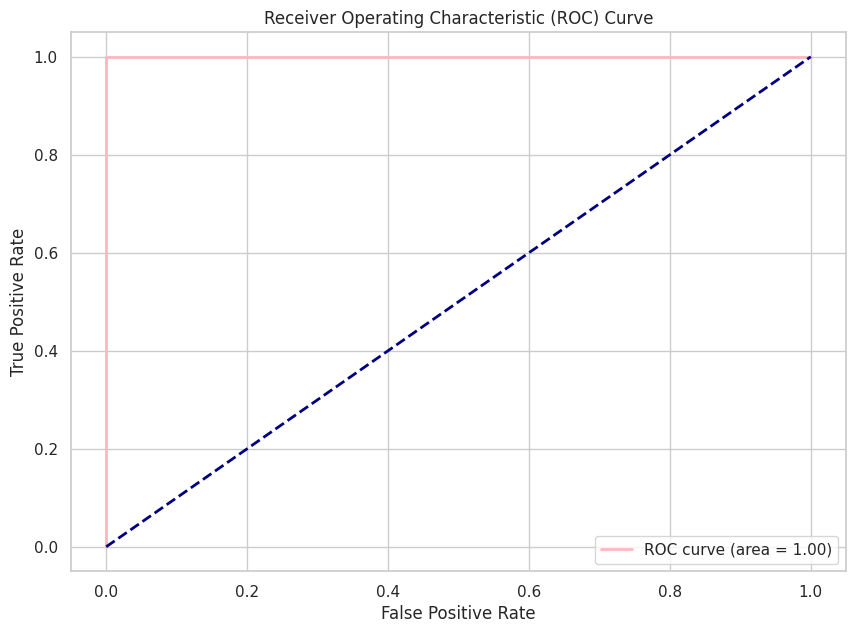

In [39]:
from sklearn.metrics import roc_curve, auc

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#FFB6C1', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Precision-Recall Curve**

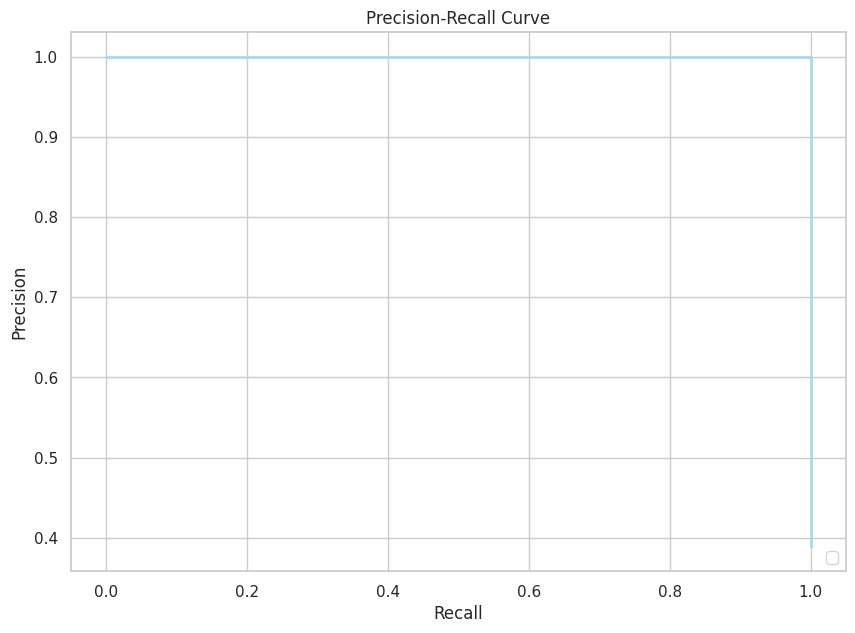

In [43]:
from sklearn.metrics import precision_recall_curve

# Generate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='#ADD8E6', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


**Pairplot**

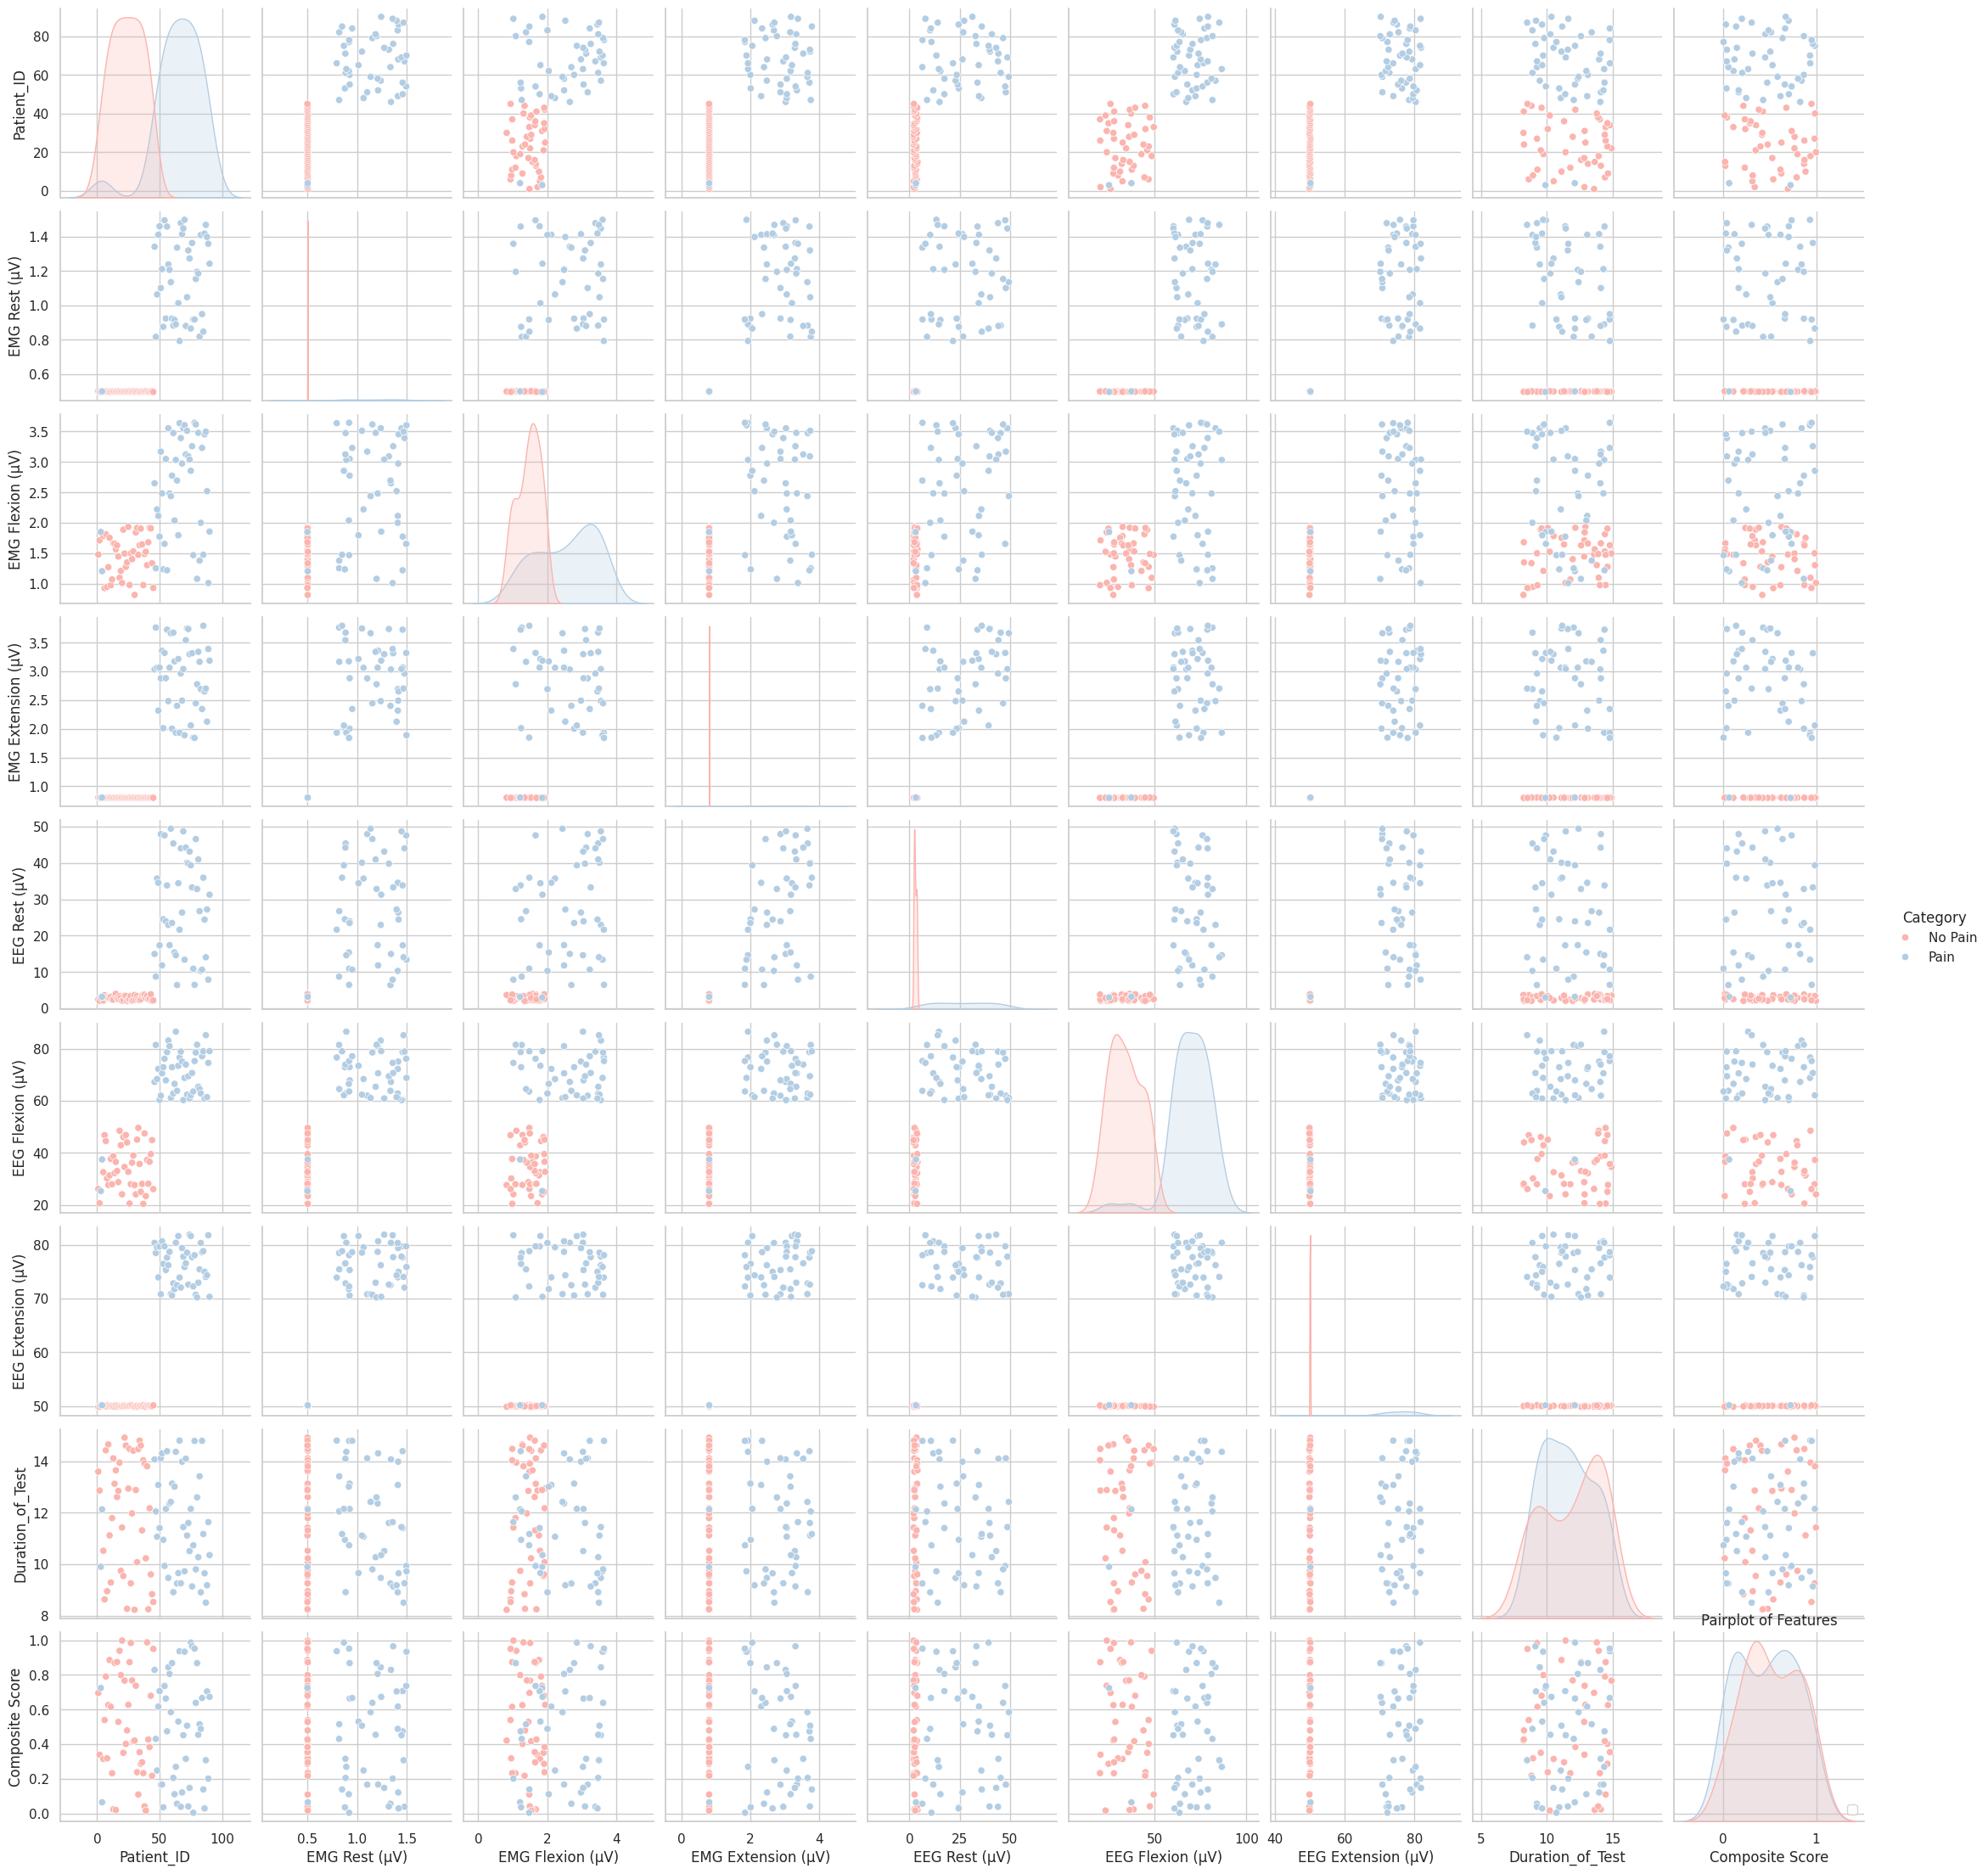

In [44]:
# Plot Pairplot
sns.pairplot(final_data, hue='Category', palette='Pastel1')
plt.title('Pairplot of Features')
plt.legend(loc="lower right")
plt.show()

**Distribution of Features**

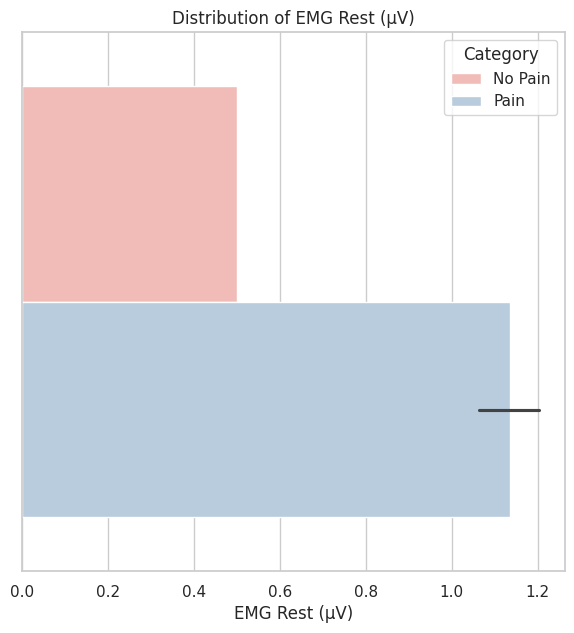

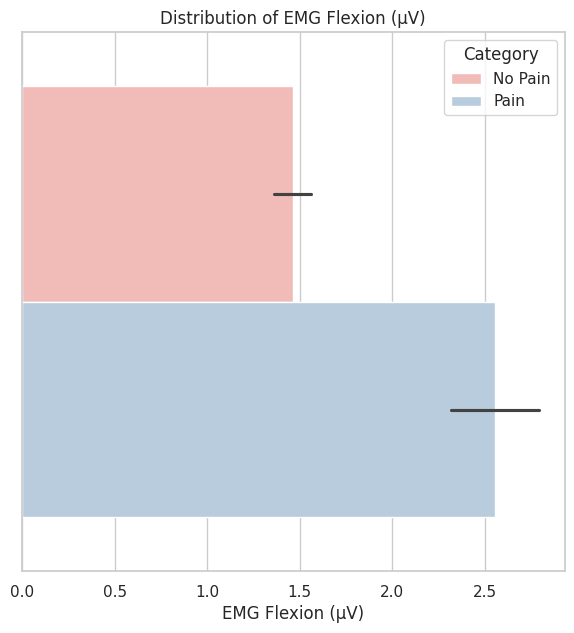

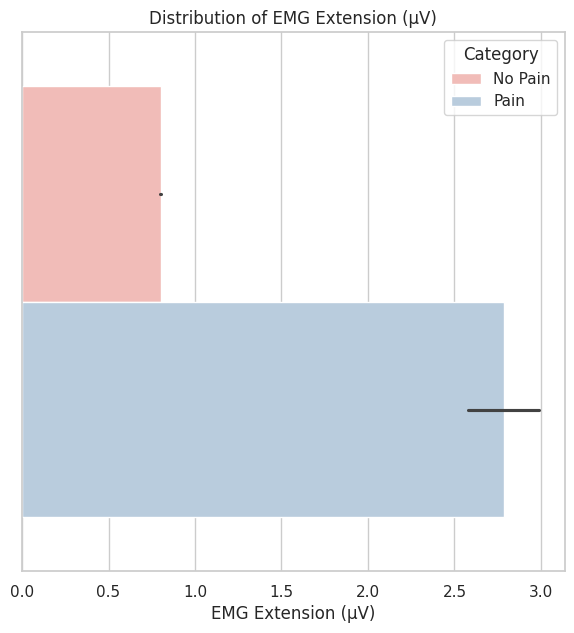

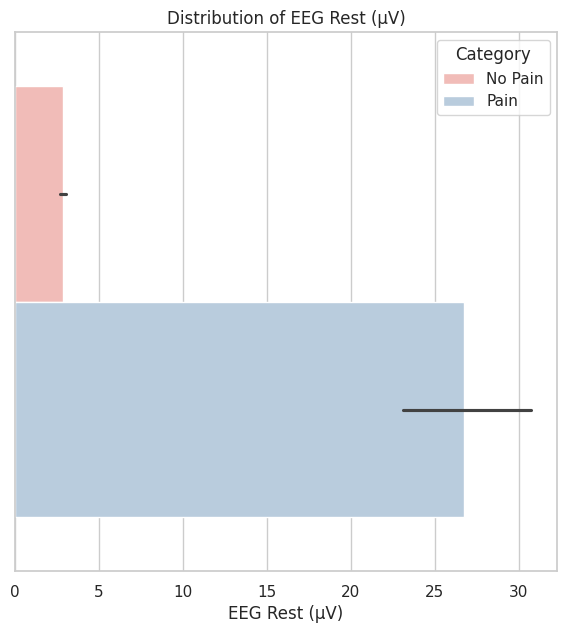

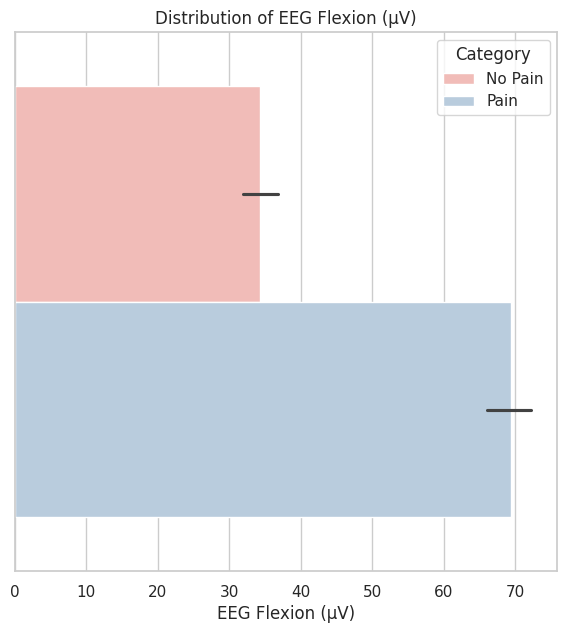

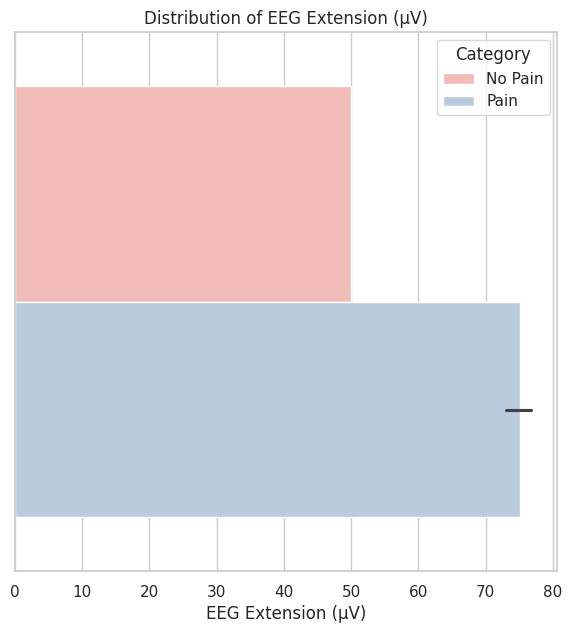

In [49]:
# Plot distributions of features
for feature in X.columns:
    plt.figure(figsize=(7, 7))
    sns.barplot(data=final_data, x=feature, hue='Category', palette='Pastel1')
    plt.title(f'Distribution of {feature}')
    plt.show()


**Correlation Matrix**

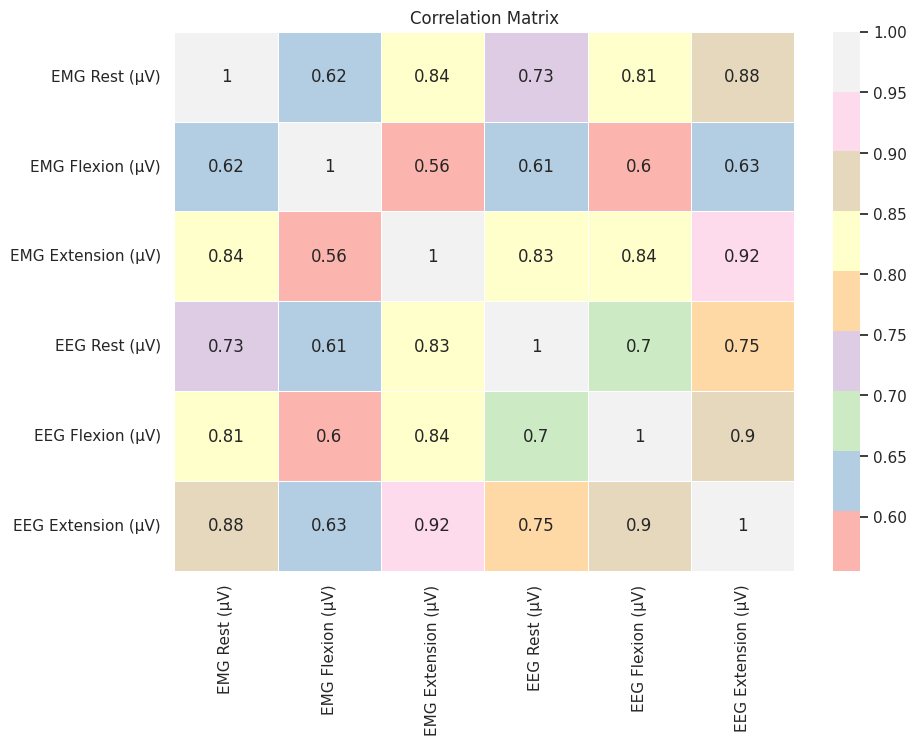

In [50]:
# Generate Correlation Matrix
correlation_matrix = X.corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**BOX-PLOTS**

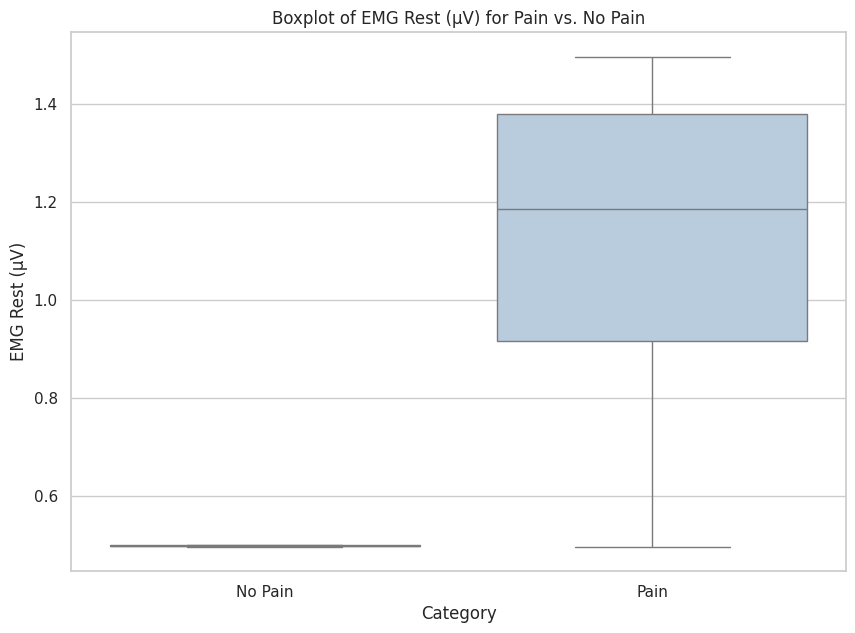

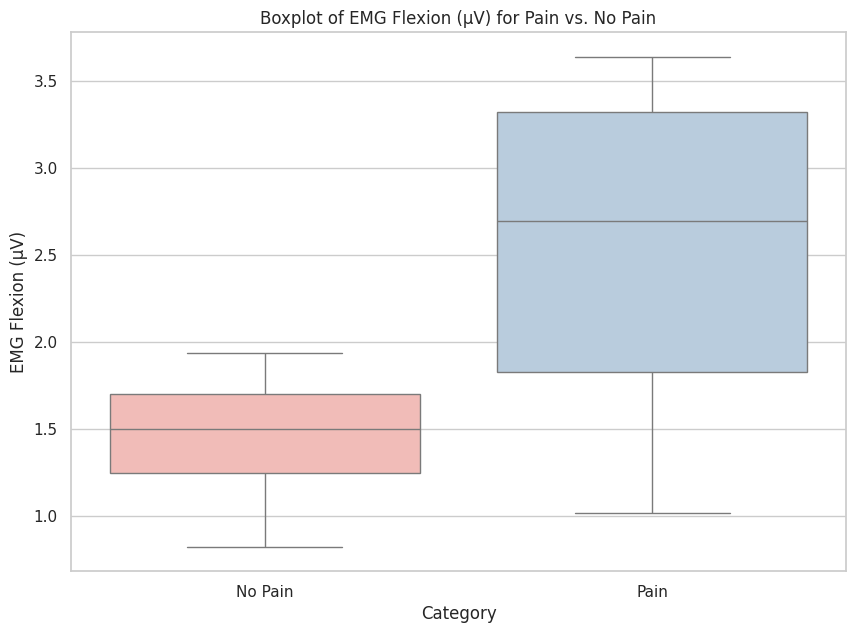

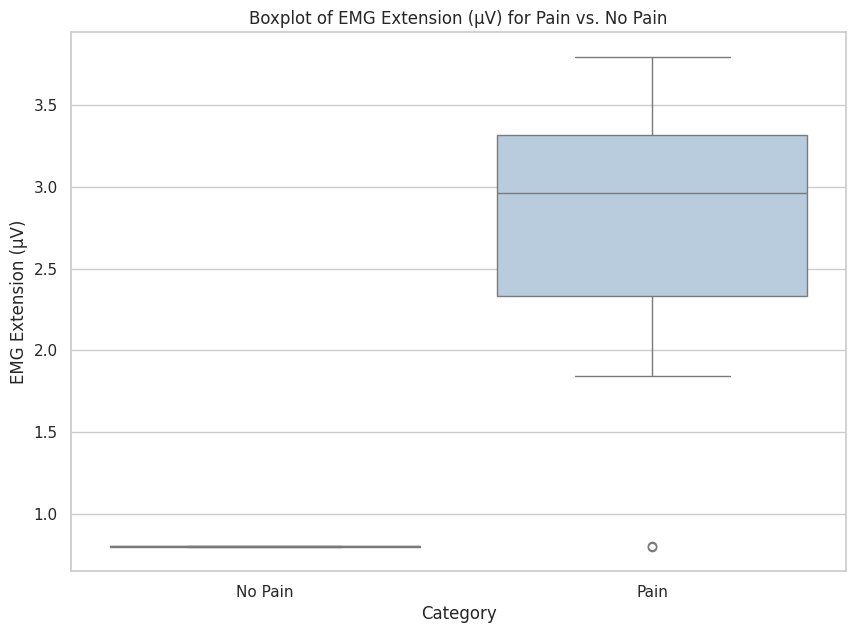

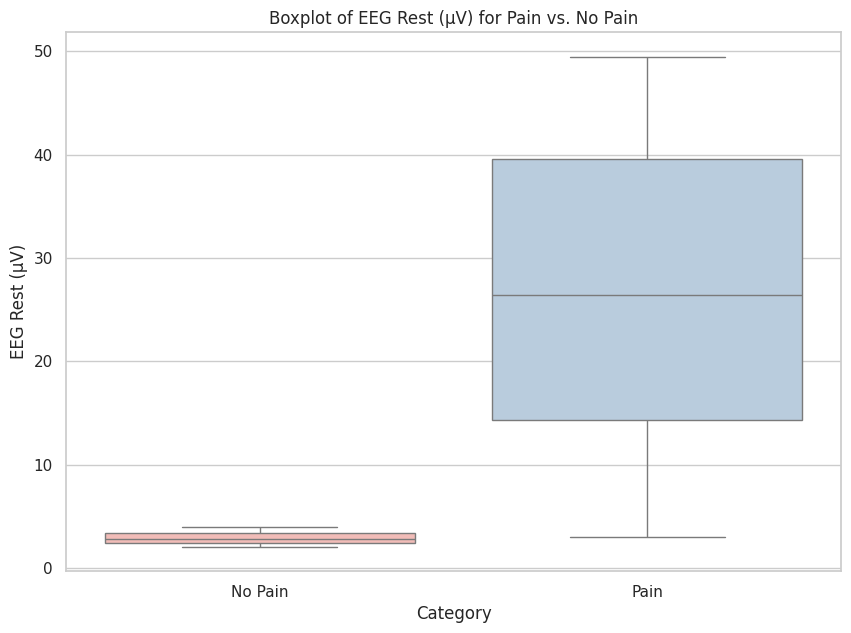

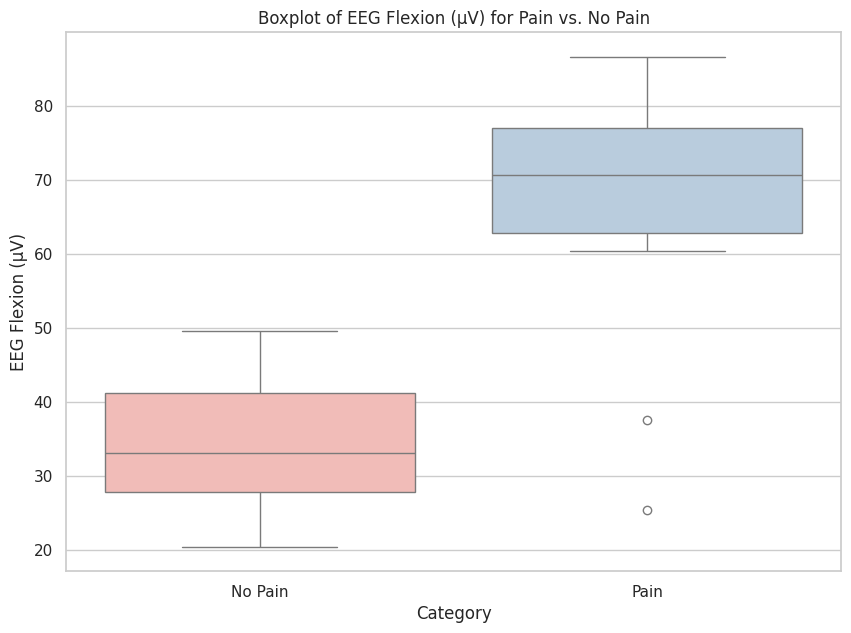

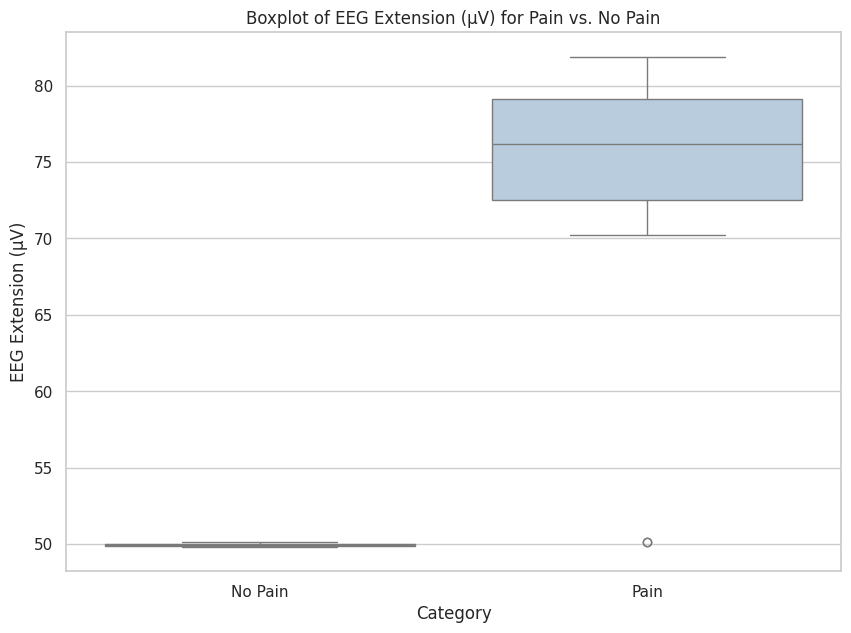

In [53]:
# List of features to plot
features = ['EMG Rest (µV)', 'EMG Flexion (µV)', 'EMG Extension (µV)', 'EEG Rest (µV)', 'EEG Flexion (µV)', 'EEG Extension (µV)']

# Generate boxplots
for feature in features:
    plt.figure(figsize=(10, 7))
    sns.boxplot(x='Category',  hue='Category', y=feature, data=final_data, palette='Pastel1')
    plt.title(f'Boxplot of {feature} for Pain vs. No Pain')
    plt.show()


**HISTOGRAM**